In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import dataset
df=pd.read_csv('Datasets.csv')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


## Data understanding

#### Check basic info of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

#### Get descriptive statistics of data

In [4]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


## Data cleaning and preparing

#### Drop irrelevant columns

In [5]:
# Get columns
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [6]:
df=df[[#CustomerID', 
    'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']].copy()
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


#### Check missing value

In [7]:
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [8]:
df['Tenure'].fillna(df.Tenure.median(), inplace=True)
df['WarehouseToHome'].fillna(df.WarehouseToHome.median(), inplace=True)
df['HourSpendOnApp'].fillna(df.HourSpendOnApp.median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(round(df.OrderAmountHikeFromlastYear.mean()), inplace=True)
df['CouponUsed'].fillna(df.CouponUsed.median(), inplace=True)
df['OrderCount'].fillna(df.OrderCount.median(), inplace=True)
df['DaySinceLastOrder'].fillna(df.DaySinceLastOrder.median(), inplace=True)

In [9]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## Exploratory data analysis

### Univeriate analysis

**Categorical variables**

In [10]:
# Frequency of categorical variables
cat=df.select_dtypes(include='object').columns #Group object type columns
for col in cat:
    print(df[col].value_counts())

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
Gender
Male      3384
Female    2246
Name: count, dtype: int64
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


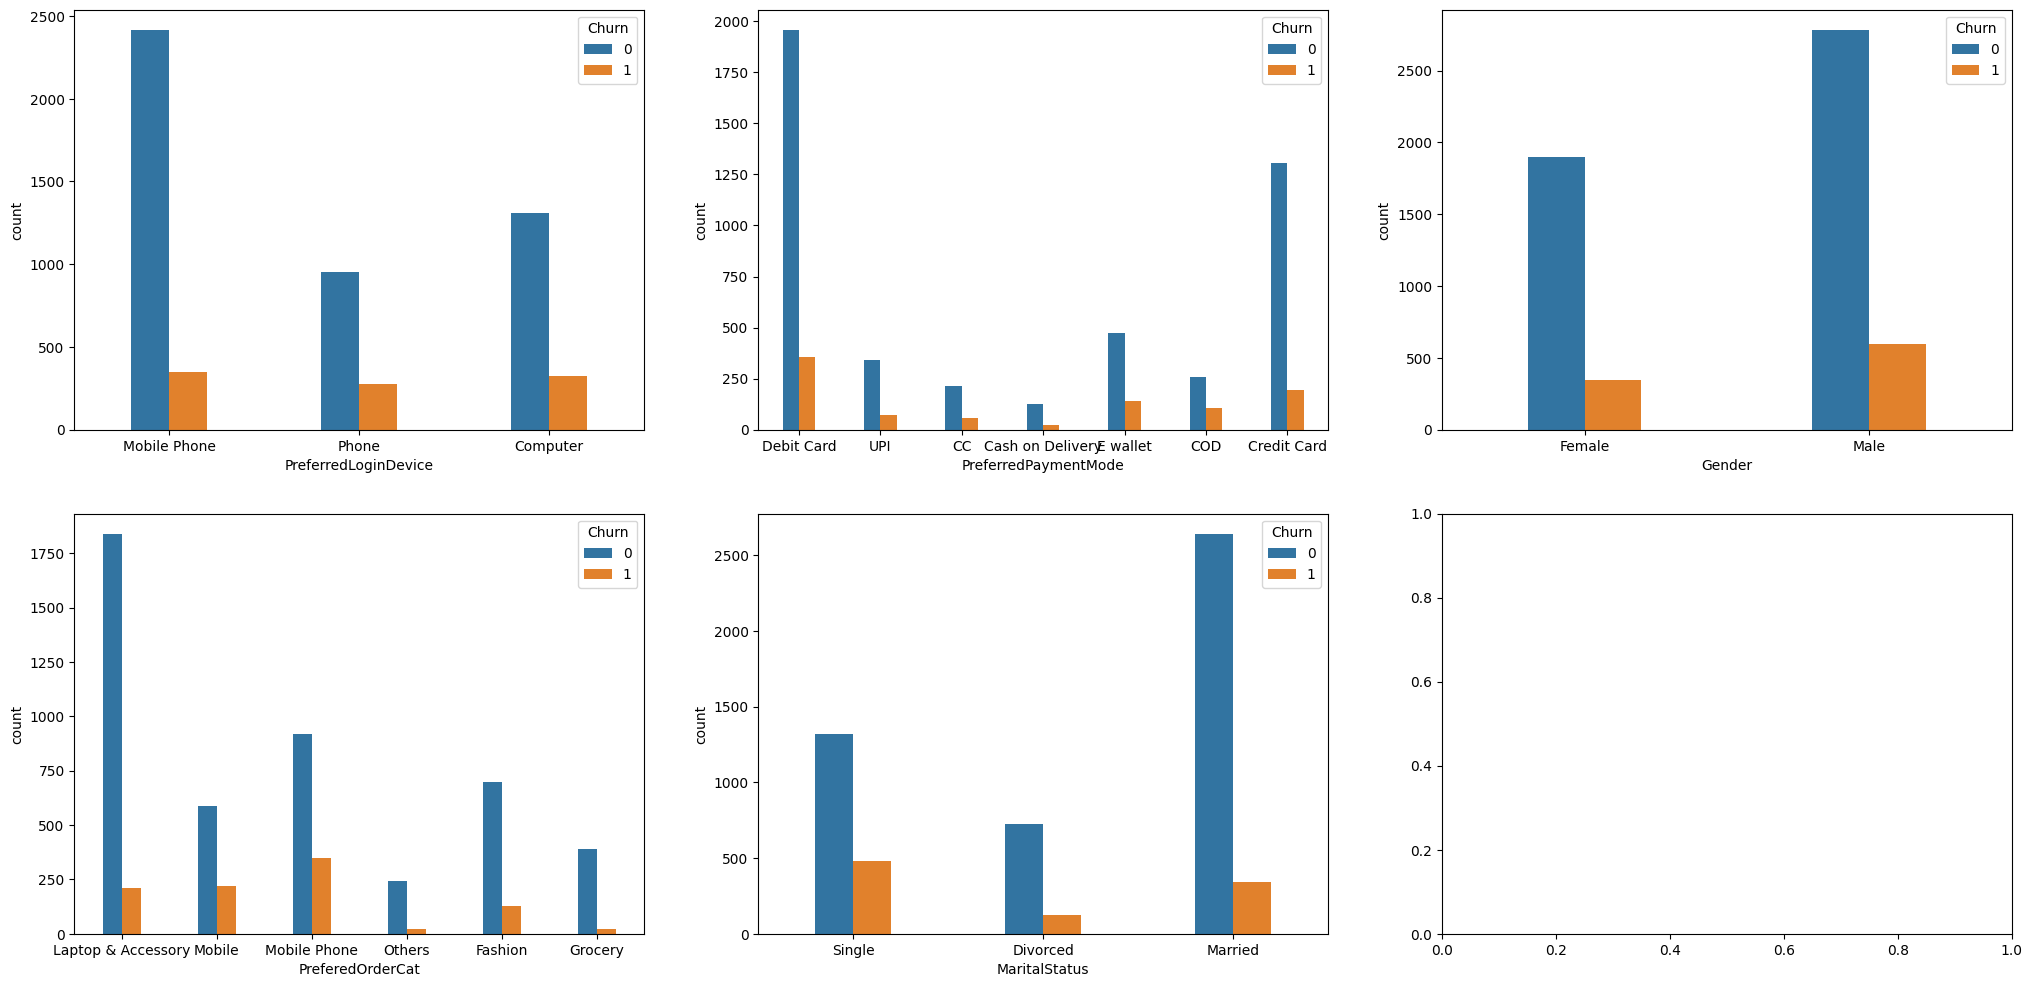

In [11]:
# Visualize each variable with churn
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(25,12))
for col, subplot in zip(cat, ax.flatten()):
    sns.countplot(x=df[col], hue=df.Churn, ax=subplot, width=0.4)

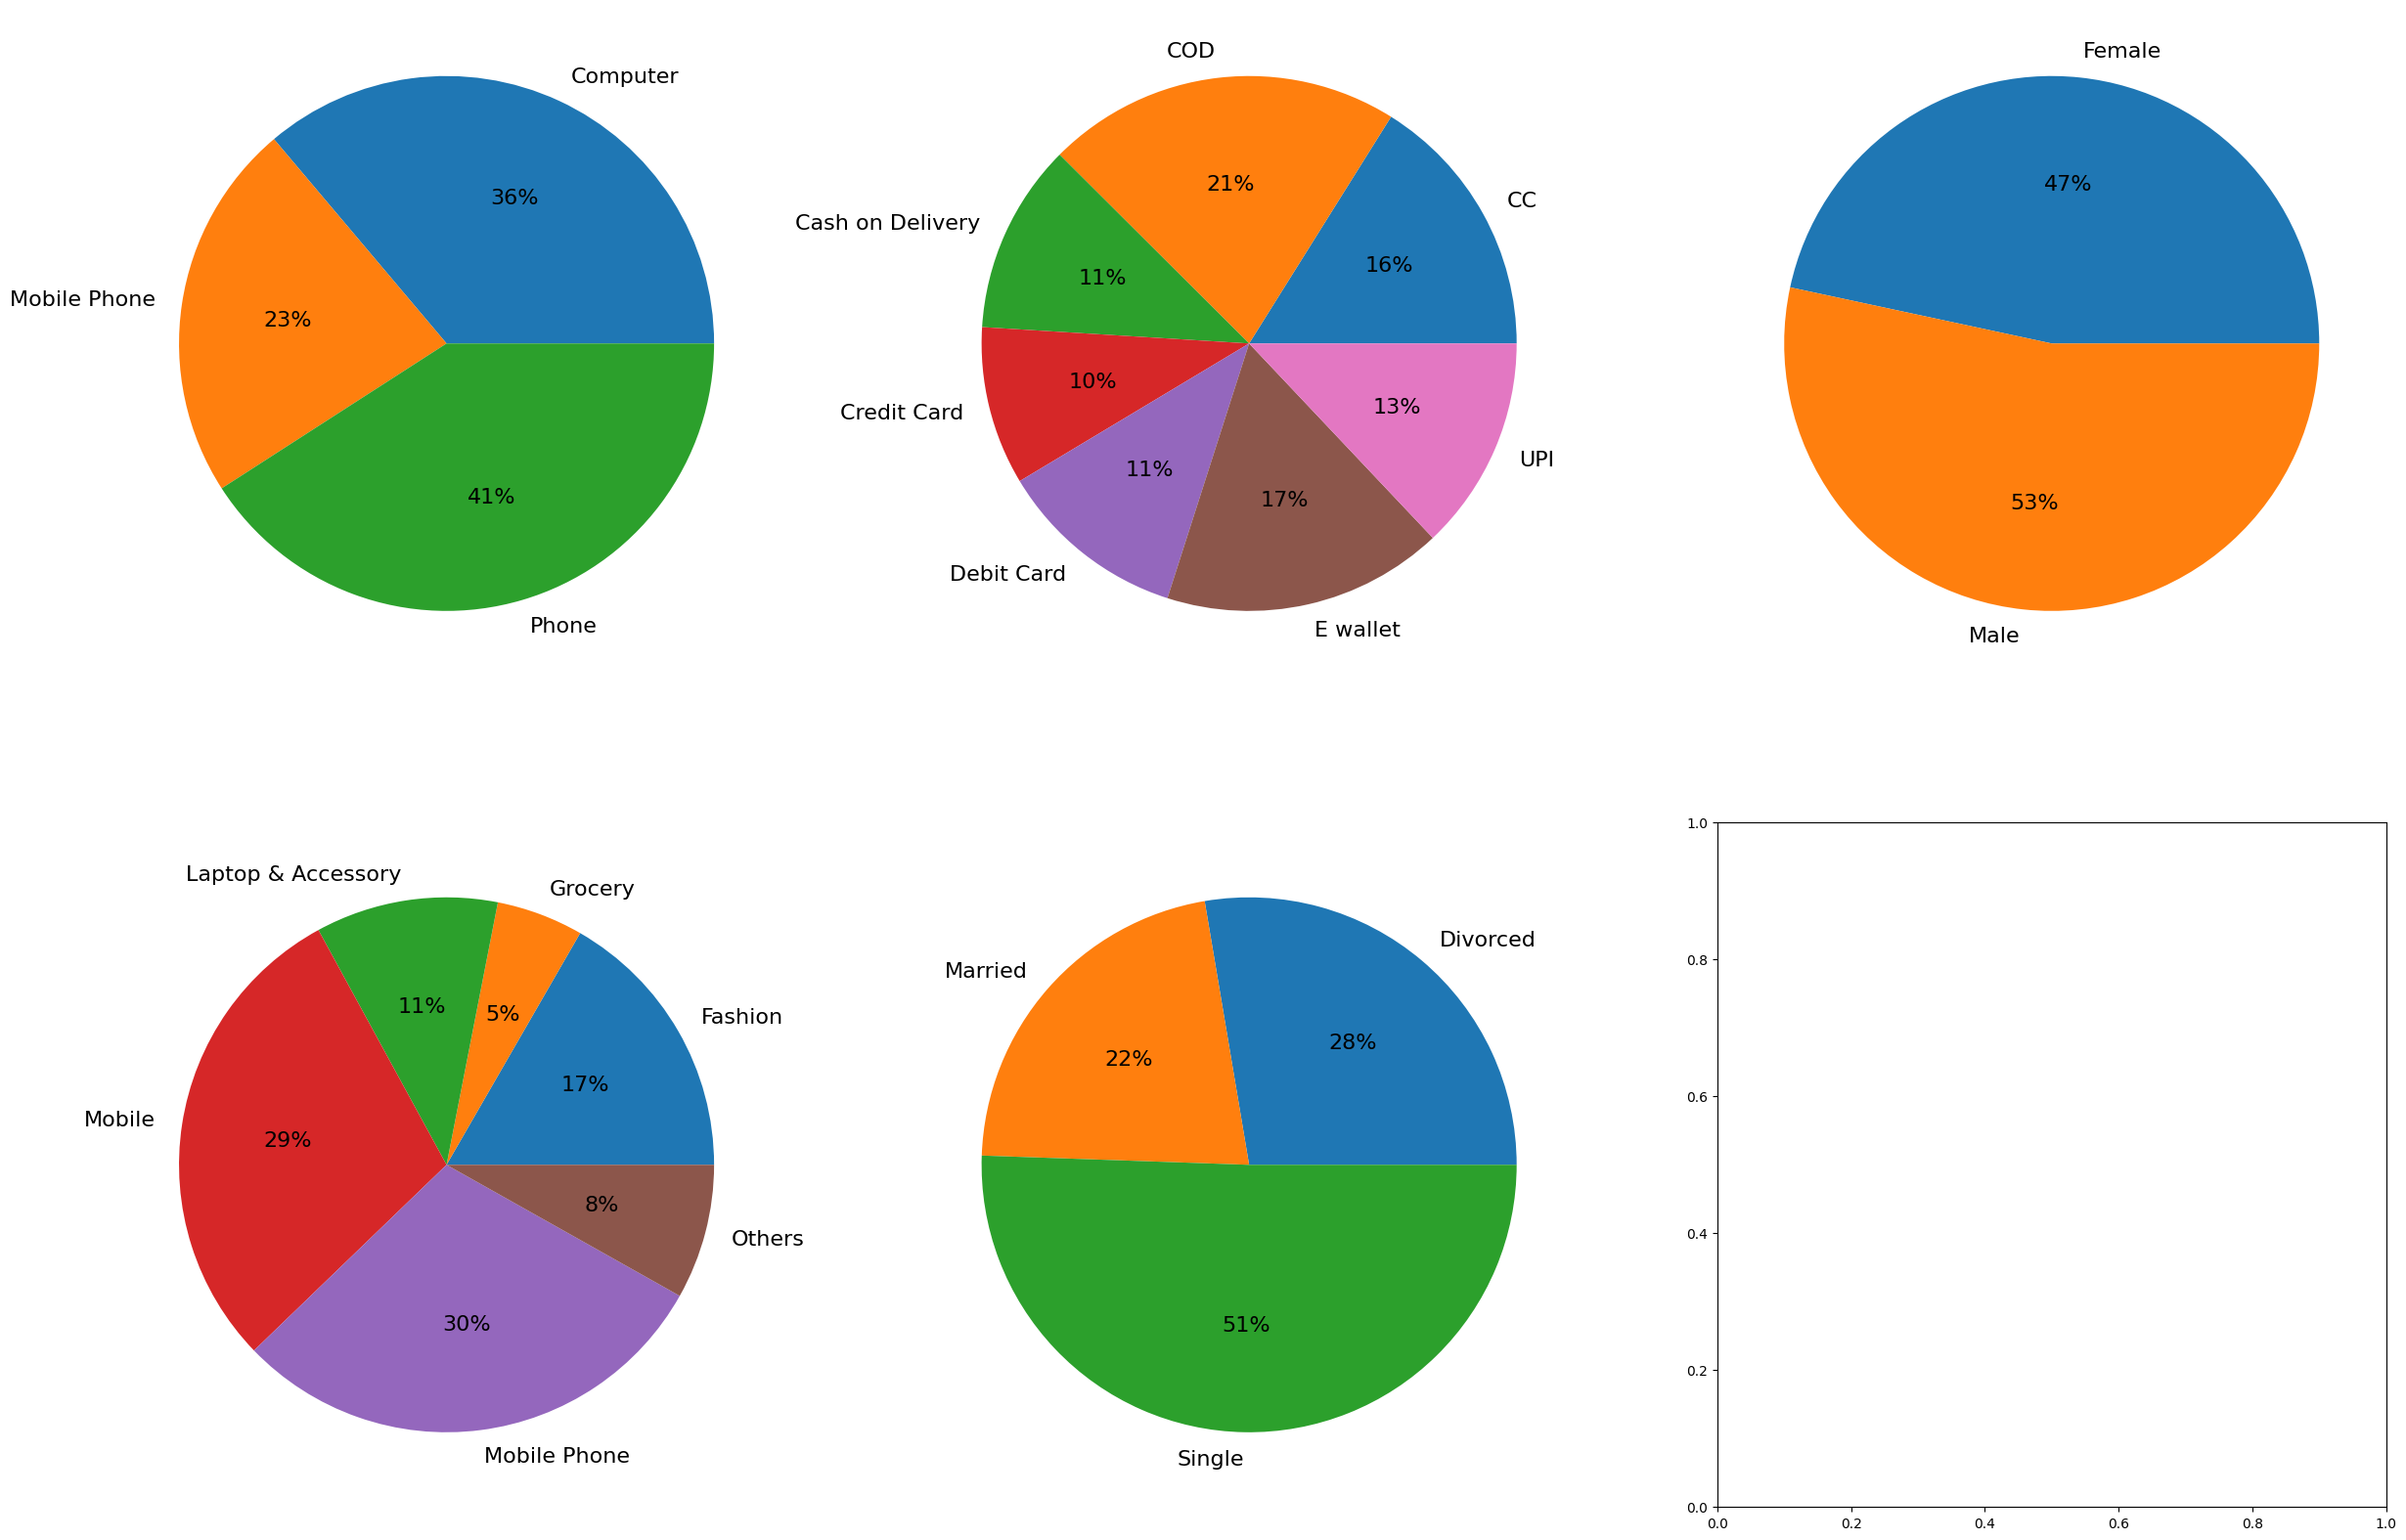

In [12]:
# Visualize percent churn distributed by each categorical variable
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
for col,subplot in zip(cat, ax.flatten()):
    #calculate percent churn 
    temp = df.groupby(by=df[col]).Churn.sum()
    total = df.value_counts(col).sort_index()
    res1 = temp/total*100
    #visualising the result
    subplot.pie(labels = res1.index, x = res1.values, autopct='%.0f%%',textprops={'fontsize': 16})

**Numerical variables**

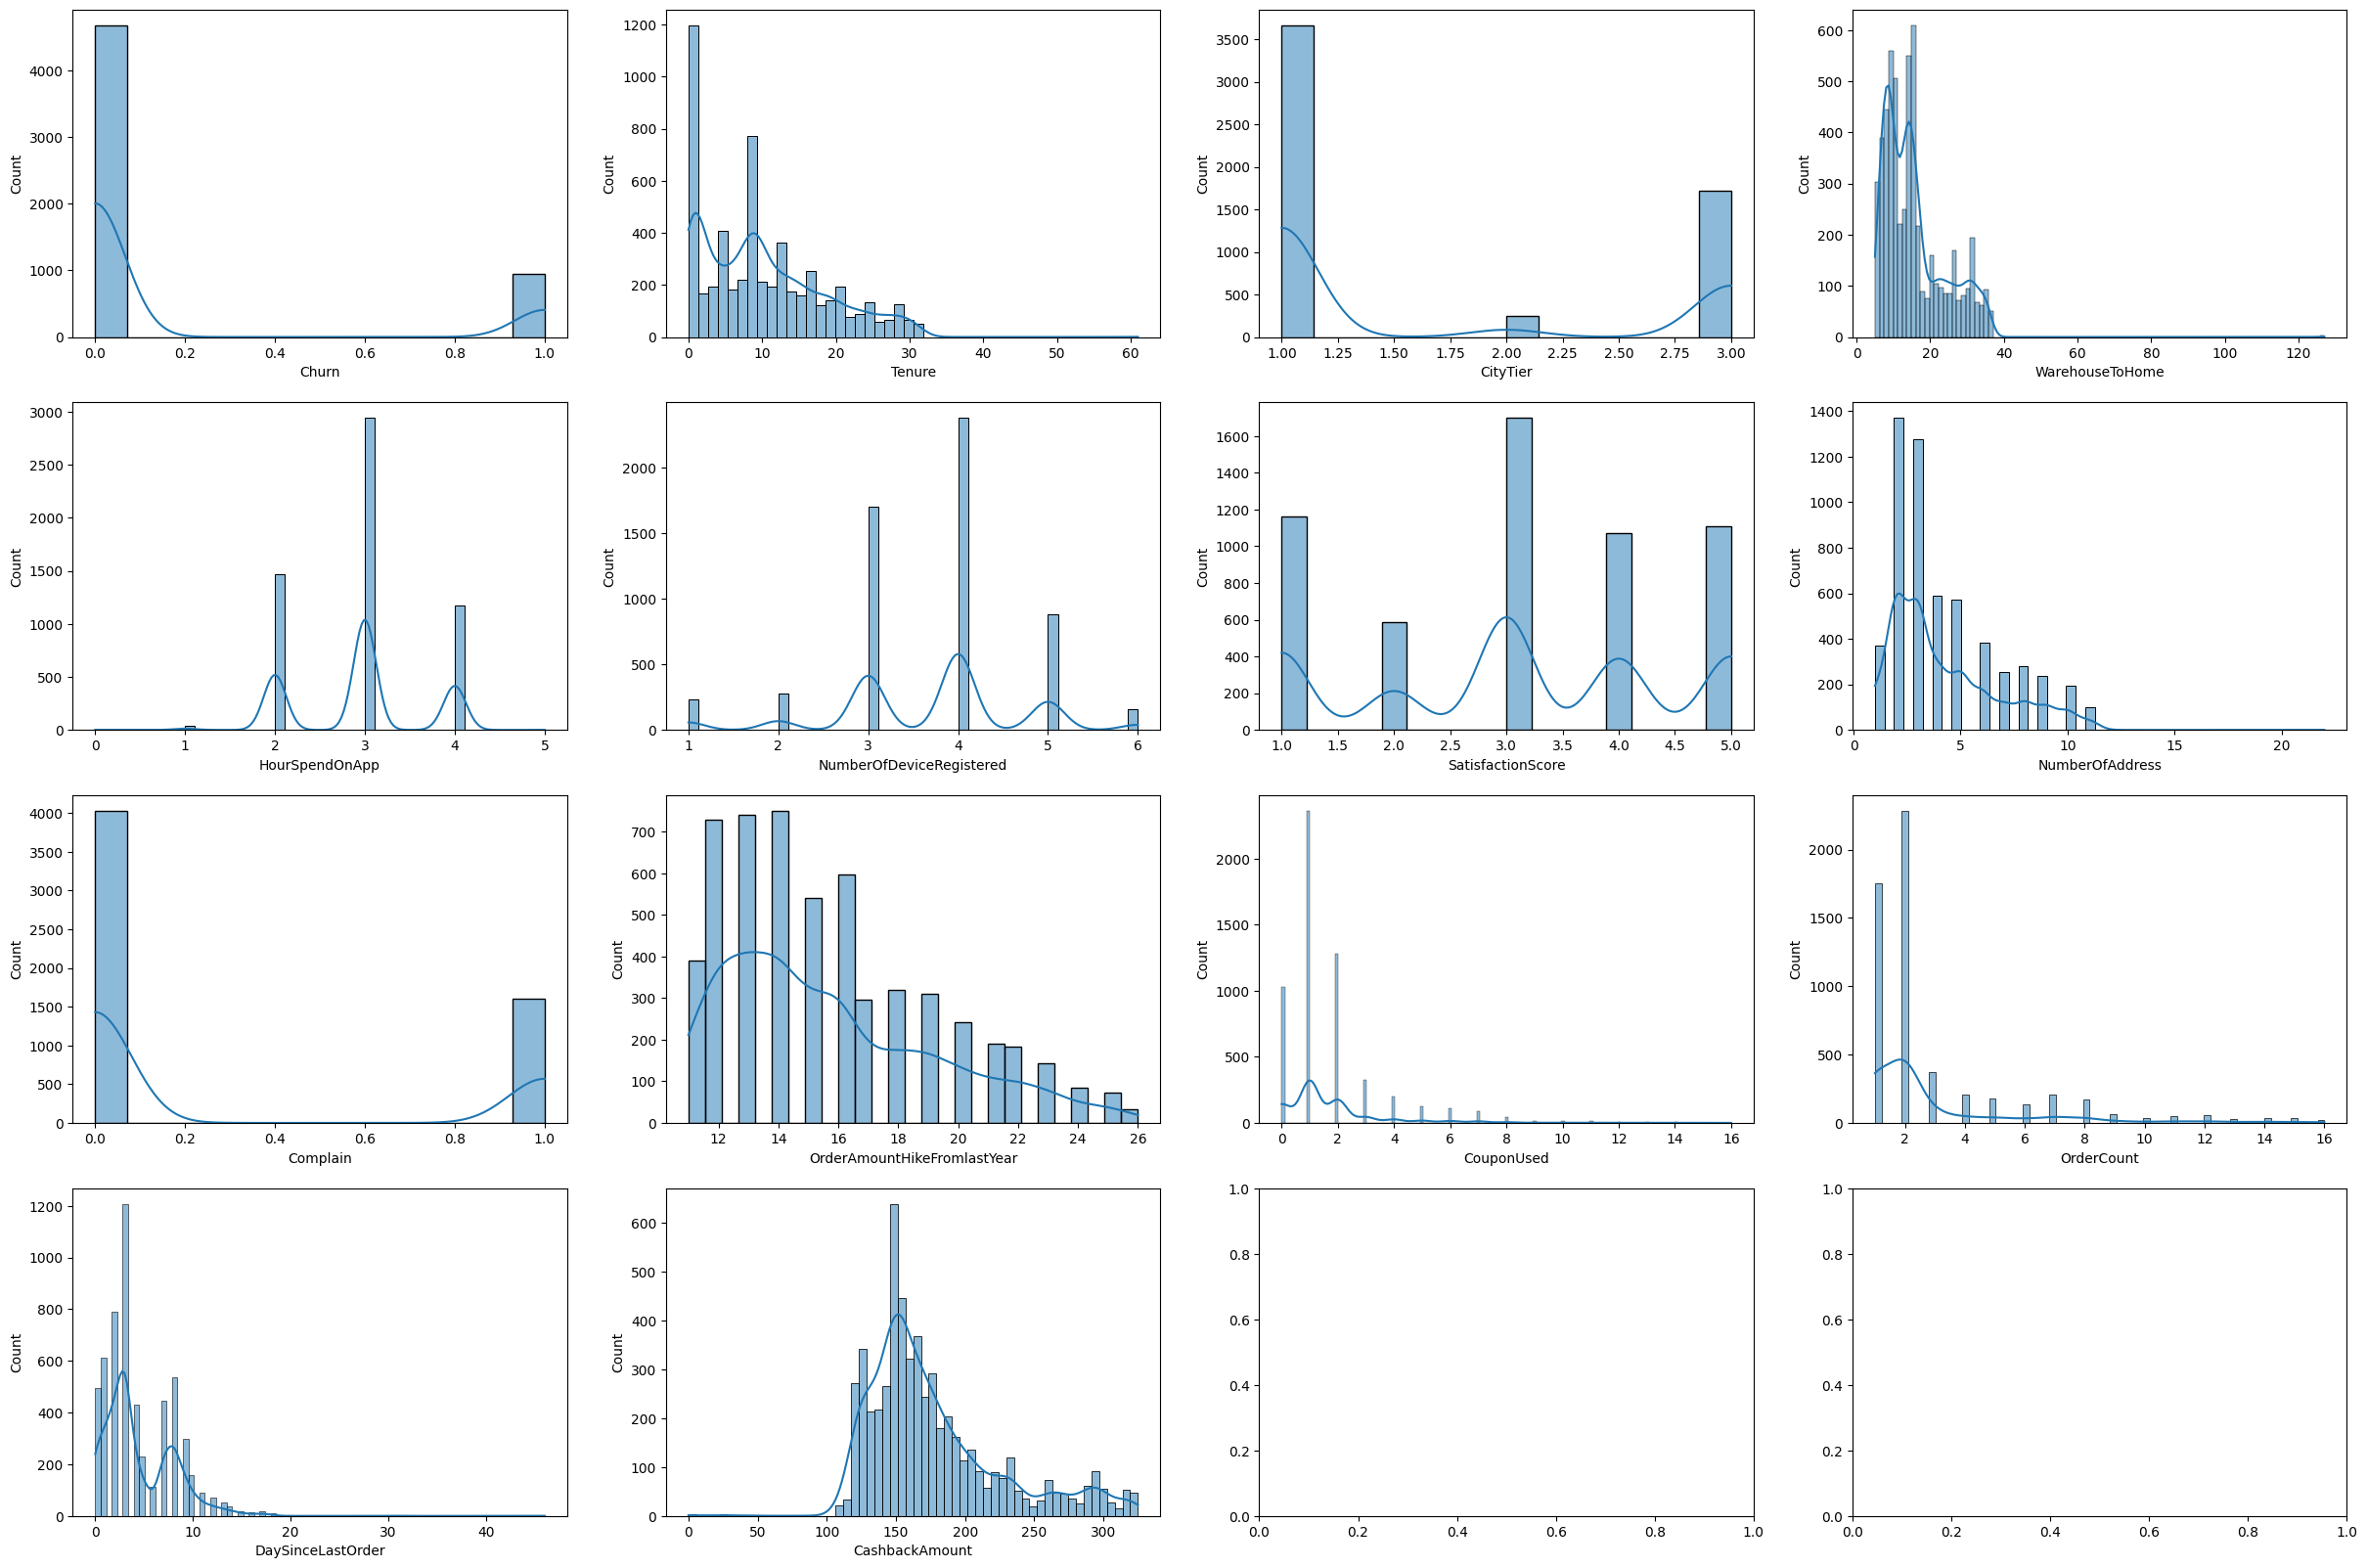

In [13]:
num=df.select_dtypes(exclude='object').columns #Group numeric type columns
fig, ax=plt.subplots(nrows=4, ncols=4, figsize=(30,20))
for i, subplot in zip(num, ax.flatten()):
    sns.histplot(df[i], kde=True, ax=subplot)

### Biveriate analysis

In [14]:
# Group numerical variables
num_var=df.select_dtypes(exclude='object').columns
df_num=df.loc[:, num_var]
df_num.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,130


<Axes: >

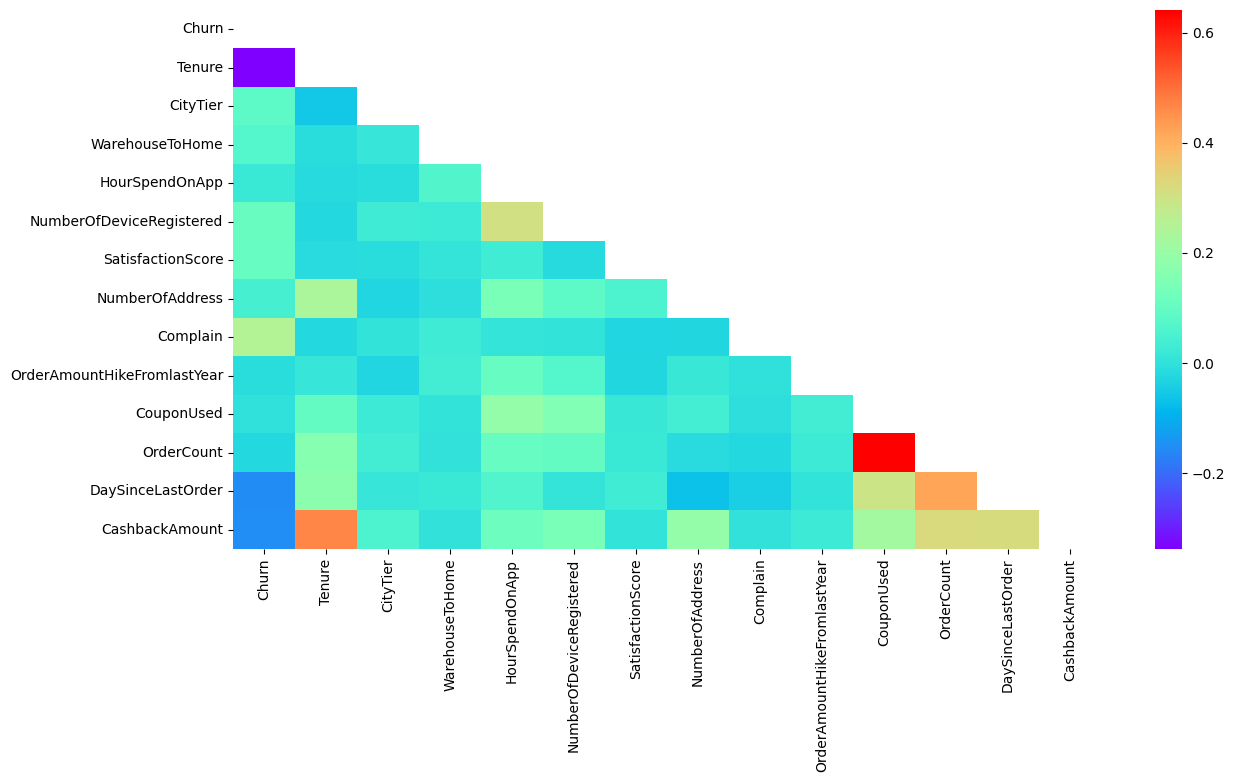

In [15]:
plt.figure(figsize=(14,7)) 
matrix = np.triu(df_num.corr(method='pearson'))
sns.heatmap(df_num.corr(method='pearson'), mask=matrix, cmap='rainbow')

## Data analysis/visualization

#### 1. Is there a difference in customer churn between male and female customers?

In [17]:
# Summary
total_cus=df.groupby('Gender').Gender.count().rename('Total_customer')
churn=df.groupby('Gender').Churn.sum().rename('Churn')
gender=pd.concat([total_cus, churn], axis=1)
gender=gender.assign(Stay=lambda gender:(gender.Total_customer-gender.Churn),
                     Stay_rate=lambda gender:(gender.Stay/gender.Total_customer*100),
                     Churn_rate=lambda gender:(gender.Churn/gender.Total_customer*100))
gender

,Total_customer,Churn,Stay,Stay_rate,Churn_rate
Gender,,,,,
Female,2246,348,1898,84.505788,15.494212
Male,3384,600,2784,82.269504,17.730496


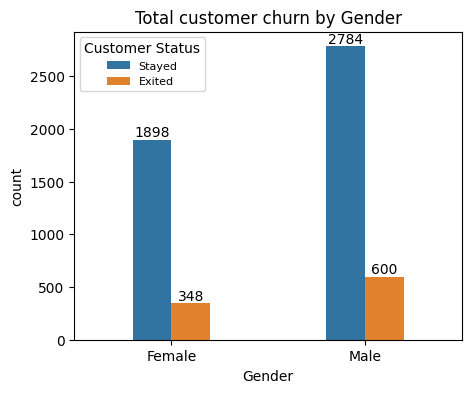

In [18]:
# Number of customer churn by gender
fig, ax=plt.subplots(figsize=(5,4))
ax=sns.countplot(data=df, x='Gender', hue='Churn', width=0.4)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Total customer churn by Gender')
plt.legend(title='Customer Status', labels=['Stayed', 'Exited'], fontsize='8');

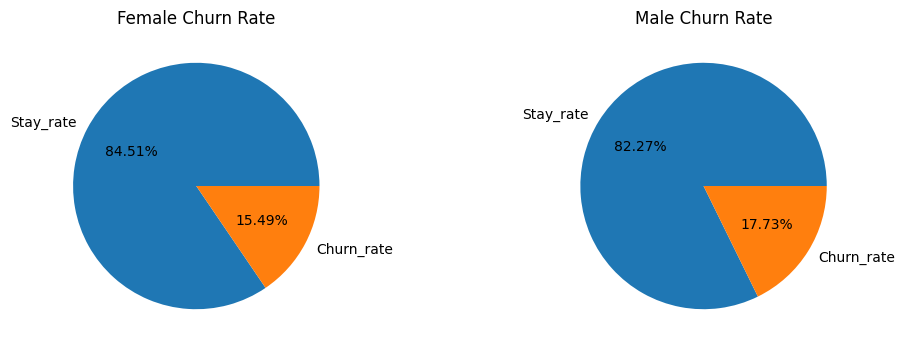

In [19]:
# Churn rate by gender
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].pie(gender.iloc[0, 3:], labels=gender.columns[3:], autopct='%.2f%%')
ax[1].pie(gender.iloc[1, 3:], labels=gender.columns[3:], autopct='%.2f%%')
ax[0].set_title('Female Churn Rate')
ax[1].set_title('Male Churn Rate');

#### 2. What is the typical tenure for churned customers?

In [29]:
# Create a new column called “TenureRange” that groups the customer tenure into 6 months, 1 year, 2 years, and more than 2 years
conditions = [
    (df['Tenure'] <= 6),
    (df['Tenure'] > 6) & (df['Tenure'] <= 12),
    (df['Tenure'] > 12) & (df['Tenure'] <= 24),
    (df['Tenure'] > 24)
]

# Corresponding labels for each condition
labels = ['Under 6 Months', 'Under 1 Year', 'Under 2 Years', 'More than 2 Years']

# Create the new column based on conditions
df['Tenure Range'] = np.select(conditions, labels, default='Unknown')

In [51]:
tenure=df.groupby('Tenure Range').agg({'Tenure Range':'count',
                                      'Churn':'sum'})
tenure=tenure.rename(columns={'Tenure Range':'Total customer', 'Churn':'Customer churn'})
tenure=tenure.assign(Churn_rate=lambda tenure:(tenure['Customer churn']/tenure['Total customer']*100))
tenure=tenure.assign(Churn_rate=tenure['Churn_rate'].round(2))
tenure

,Total customer,Customer churn,Churn_rate
Tenure Range,,,
More than 2 Years,429,0,0.00
Under 1 Year,1584,156,9.85
Under 2 Years,1467,95,6.48
Under 6 Months,2150,697,32.42


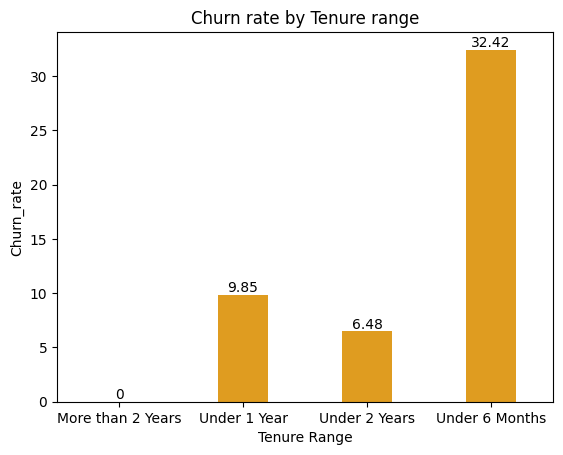

In [52]:
ax=sns.barplot(data=tenure, x='Tenure Range', y='Churn_rate', width=0.4, color='orange')
plt.title('Churn rate by Tenure range')
for i in ax.containers:
    ax.bar_label(i,)

#### 3. Does higher satisfaction score lead to a lower probability of churning?

In [53]:
sat_score=df.groupby('SatisfactionScore').agg({'SatisfactionScore':'count',
                                               'Churn':'sum'})
sat_score=sat_score.rename(columns={'SatisfactionScore':'Total customer', 'Churn':'Customer churn'})
sat_score=sat_score.assign(Churn_rate=lambda sat_score:(sat_score['Customer churn']/sat_score['Total customer']*100))
sat_score=sat_score.assign(Churn_rate=sat_score['Churn_rate'].round(2))
sat_score

,Total customer,Customer churn,Churn_rate
SatisfactionScore,,,
1,1164,134,11.51
2,586,74,12.63
3,1698,292,17.20
4,1074,184,17.13
5,1108,264,23.83


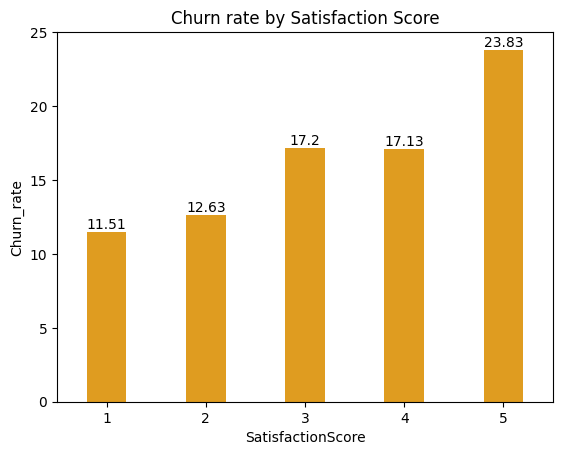

In [54]:
ax=sns.barplot(data=sat_score, x='SatisfactionScore', y='Churn_rate', width=0.4, color='orange')
plt.title('Churn rate by Satisfaction Score')
for i in ax.containers:
    ax.bar_label(i,)

#### 4. Is there any correlation between the warehouse-to-home distance and customer churn?

In [59]:
# Create WarehouseToHomeRange columns to group the distance into very close, close, moderate, and far
conditions = [
    (df['WarehouseToHome'] <= 10),
    (df['WarehouseToHome'] > 10) & (df['WarehouseToHome'] <= 20),
    (df['WarehouseToHome'] > 20) & (df['WarehouseToHome'] <= 30),
    (df['WarehouseToHome'] > 30)
]

# Corresponding labels for each condition
labels = ['Very Close', 'Close', 'Moderate', 'Far']

# Create the new column based on conditions
df['WarehouseToHomeRange'] = np.select(conditions, labels, default='Unknown')

In [63]:
warehouse=df.groupby('WarehouseToHomeRange').agg({'WarehouseToHomeRange':'count',
                                      'Churn':'sum'})
warehouse=warehouse.rename(columns={'WarehouseToHomeRange':'Total customer', 'Churn':'Customer churn'})
warehouse=warehouse.assign(Churn_rate=lambda warehouse:(warehouse['Customer churn']/warehouse['Total customer']*100))
warehouse=warehouse.assign(Churn_rate=warehouse['Churn_rate'].round(2))
warehouse

,Total customer,Customer churn,Churn_rate
WarehouseToHomeRange,,,
Close,2318,408,17.60
Far,471,98,20.81
Moderate,872,176,20.18
Very Close,1969,266,13.51


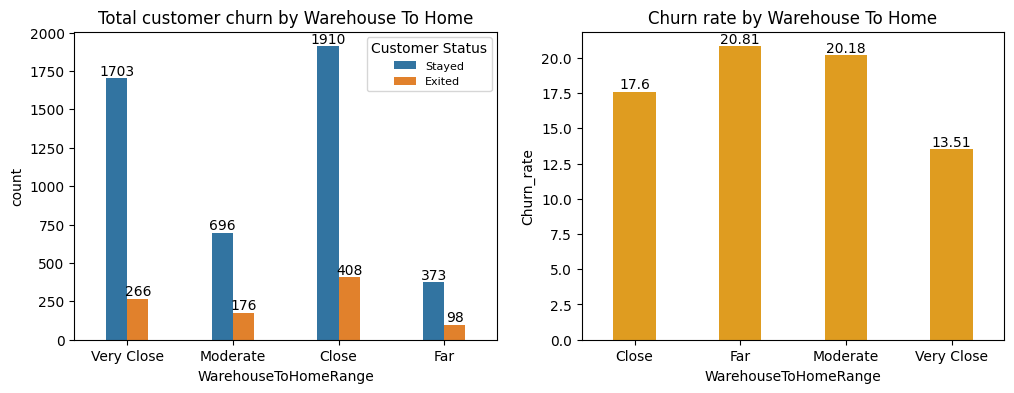

In [80]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1=sns.countplot(data=df, x='WarehouseToHomeRange', hue='Churn', width=0.4, ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_title('Total customer churn by Warehouse To Home')
ax1.legend(title='Customer Status', labels=['Stayed', 'Exited'], fontsize='8')

ax2=sns.barplot(data=warehouse, x='WarehouseToHomeRange', y='Churn_rate', width=0.4, color='orange', ax=ax[1])
ax2.set_title('Churn rate by Warehouse To Home')
for i in ax2.containers:
    ax2.bar_label(i,)